In [21]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

import matplotlib.pyplot as plt
from keras import regularizers

#### Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [4]:
train_labels[0]

1

In [5]:
# Diccionario de palabras
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

##### Vectorizamos haciendo one-hot encoding

In [7]:
def vectorizar(sequences, dim=10000):
	results = np.zeros((len(sequences), dim))
	for i, sequences in enumerate(sequences):
		results[i, sequences]= 1
	return results

In [8]:
# Transformar la data para ingresar a keras
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
# Convertir las etiquetas a flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# Preparamos la data para validación
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

#### Creamos el modelo

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compilamos el modelo 1

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

#### Entrenamos el modelo 1

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


#### Analizamos resultados

In [14]:
# Analizamos resultados
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

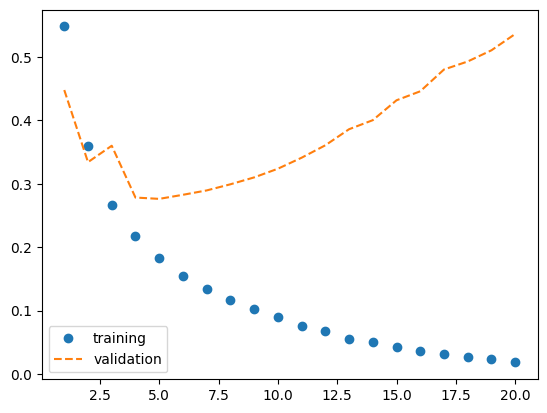

In [15]:
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [16]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5751 - accuracy: 0.8592


[0.5751188397407532, 0.8591600060462952]

#### Ahora con un modelo menos complejo

In [19]:
# Modelo con mismas capas y menos neuronas
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5725 - accuracy: 0.7585 - val_loss: 0.4809 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4110 - accuracy: 0.8875 - val_loss: 0.4021 - val_accuracy: 0.8514
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3234 - accuracy: 0.9113 - val_loss: 0.3372 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2667 - accuracy: 0.9258 - val_loss: 0.3067 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2275 - accuracy: 0.9354 - val_loss: 0.2917 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1982 - accuracy: 0.9424 - val_loss: 0.2825 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1747 - accuracy: 0.9509 - val_loss: 0.2803 - val_accuracy: 0.8884
Epoch 8/20
30

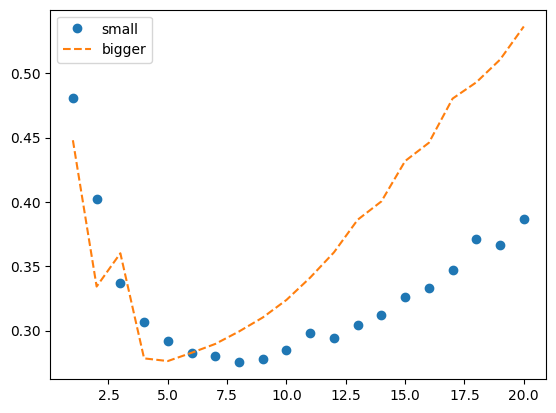

In [20]:
# Analizamos resultados de este segundo modelo con el primero
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values_2 = history_dict2['val_loss']

epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_2, 'o',label='small')
plt.plot(epoch,val_loss_values, '--',label='bigger')
plt.legend()
plt.show()

#### Regularización

In [23]:
# Modelo con mismas capas y neuronas que el primero
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5734 - accuracy: 0.7819 - val_loss: 0.4559 - val_accuracy: 0.8616
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3807 - accuracy: 0.8911 - val_loss: 0.3646 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3045 - accuracy: 0.9136 - val_loss: 0.3376 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2616 - accuracy: 0.9305 - val_loss: 0.3388 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2363 - accuracy: 0.9399 - val_loss: 0.3302 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2212 - accuracy: 0.9456 - val_loss: 0.3407 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2062 - accuracy: 0.9513 - val_loss: 0.3427 - val_accuracy: 0.8855
Epoch 8/20
30

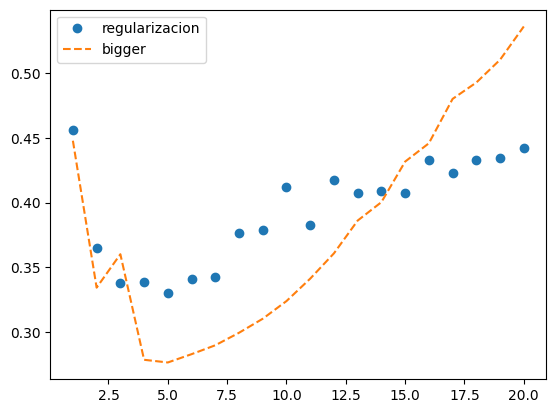

In [24]:
# Analizamos resultados de este modelo con regularizacion y el primero
history_dict3 = history3.history
loss_values_3 = history_dict3['loss']
val_loss_values_3 = history_dict3['val_loss']

epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_3, 'o',label='regularizacion')
plt.plot(epoch,val_loss_values, '--',label='bigger')
plt.legend()
plt.show()

#### Dropout

In [25]:
# Modelo con mismas neuronas que el primero pero con dos capas mas
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6596 - accuracy: 0.5767 - val_loss: 0.5874 - val_accuracy: 0.8194
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5910 - accuracy: 0.6753 - val_loss: 0.5248 - val_accuracy: 0.8499
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5530 - accuracy: 0.7233 - val_loss: 0.4742 - val_accuracy: 0.8669
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5187 - accuracy: 0.7637 - val_loss: 0.4347 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4992 - accuracy: 0.7784 - val_loss: 0.4224 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4819 - accuracy: 0.7883 - val_loss: 0.4028 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4622 - accuracy: 0.8000 - val_loss: 0.3695 - val_accuracy: 0.8865
Epoch 8/20
30

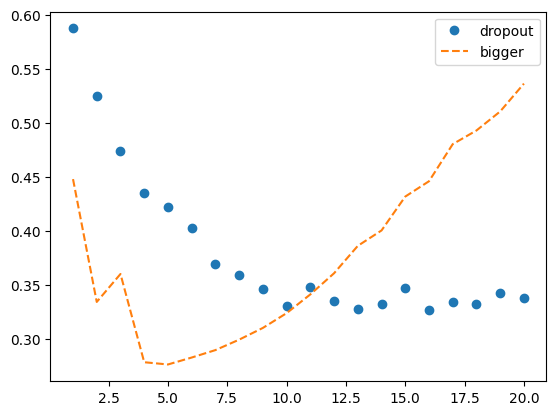

In [26]:
# Analizamos resultados de este cuarto modelo con el primero
history_dict4 = history4.history
loss_values_4 = history_dict3['loss']
val_loss_values_4 = history_dict4['val_loss']

epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='bigger')
plt.legend()
plt.show()